In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.special import gamma
from scipy.optimize import differential_evolution
from IPython.display import display, Math

In [411]:
np.random.seed(42)
plt.style.use('ggplot')

In [20]:
R = 390

## диод

In [21]:
Uin = np.array([x for x in np.arange(-1, 1.5, 0.2)])

In [22]:
Uin = np.array([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.25,
               0.5, 0.6, 0.8, 1, 1.25, 1.5, 1.75, 2])

In [ ]:
Ur = np.array([-30, -20, -30, -30, -30, 0, 4, 40, 76,
              216, 380, 560, 760, 1005, 1240]) / 1000

In [24]:
len(Uin)

15

In [370]:
I = Ur / R * 1e6

In [371]:
Ud = Uin - Ur

In [372]:
Uin

array([-1.  , -0.8 , -0.6 , -0.4 , -0.2 ,  0.  ,  0.25,  0.5 ,  0.6 ,
        0.8 ,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

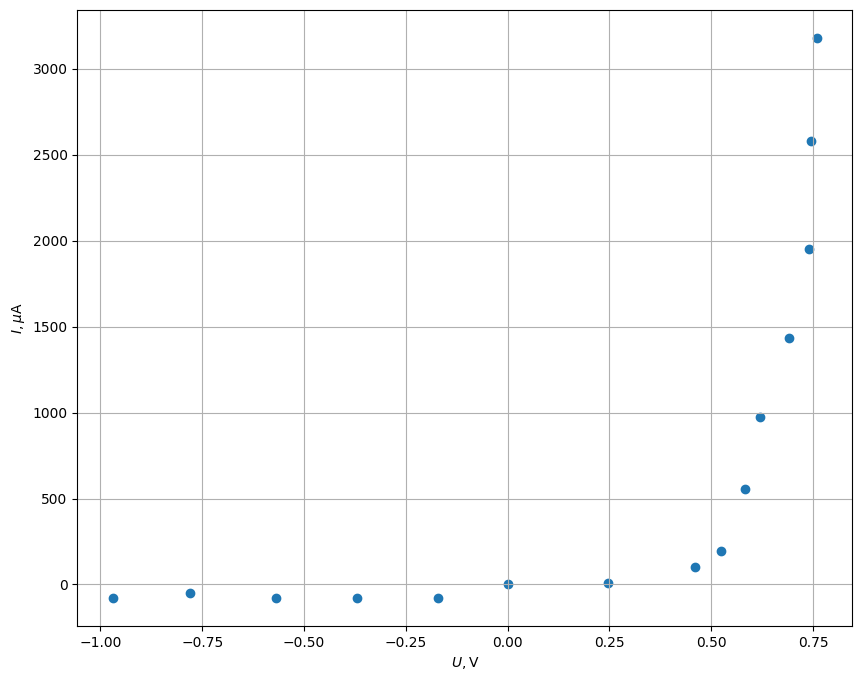

In [373]:
plt.figure(figsize=(10, 8))
plt.scatter(Ud, I)

# plt.xscale("linear")
# plt.yscale("log")
plt.xlabel(r"$U, \text{V}$")
plt.ylabel(r"$I, \mu \text{A}$")
plt.grid()
plt.show()

## стабилитрон


In [400]:
Uin2 = np.array([-8, -7, -6, -5, -3, -1, 0, 0.6, 0.8,
                 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4])



Ur2 = np.array([-2350, -1390, -490, -50, 4, 4, 0, 8, 92, 224,
                390, 580, 770, 930, 1120, 1310, 1500]) / 1000

In [401]:
I2 = Ur2 / R * 1e6

In [402]:
Us = Uin2 - Ur2

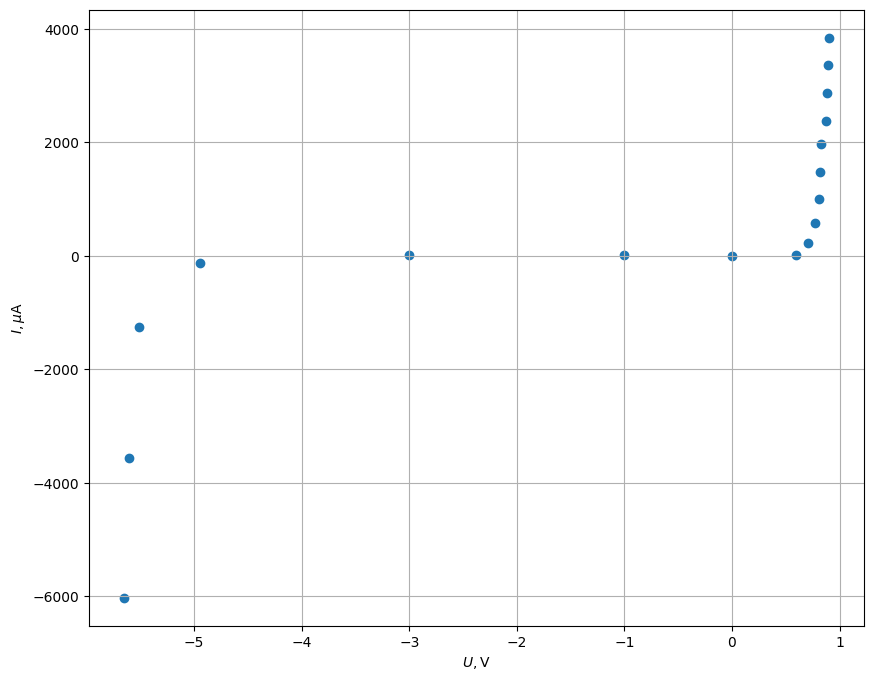

In [403]:
plt.figure(figsize=(10, 8))
plt.scatter(Us, I2)

# plt.xscale("linear")
# plt.yscale("log")
plt.xlabel(r"$U, \text{V}$")
plt.ylabel(r"$I, \mu \text{A}$")
plt.grid()
plt.show()

## уравнения Шокли

$ I(U) = I_0 (\exp{(\dfrac{U_d}{n \cdot U_T})} - 1) \\
U_T = \dfrac{kT}{e}\\
T = 300 \text{K} \to U_T =  25.852 \text{мВ}$

### диод

In [374]:
mask = Ud > 0

Ud_exp = Ud[mask]
I_exp = I[mask]

In [375]:
Ud_exp

array([0.246, 0.46 , 0.524, 0.584, 0.62 , 0.69 , 0.74 , 0.745, 0.76 ])

In [376]:
def compute_I(I0, U, n):
    U_T = 0.025852
    return I0 * (np.exp(U / (U_T * n) - 1))

In [377]:
def loss_function(params, I, U):
    I0, n = params
    I_calc = compute_I(I0, U, n)
    return np.mean((I - I_calc) ** 2)

In [378]:
initial_params = [0.1, 2]  # I0, n, T
bounds = [
    (1e-8, 20),
    (1, 4),
]

In [379]:
result = minimize(loss_function, initial_params, args=(
    I_exp, Ud_exp), bounds=bounds, method="Nelder-Mead")

In [412]:
result = differential_evolution(loss_function, bounds, args=(
    I_exp, Ud_exp))

In [413]:
I0_opt_d, n_opt_d = result.x
print(f"Оптимальные параметры: I0 = {I0_opt_d:.3e}, n = {n_opt_d:.3e}")

Оптимальные параметры: I0 = 4.253e+00, n = 3.904e+00


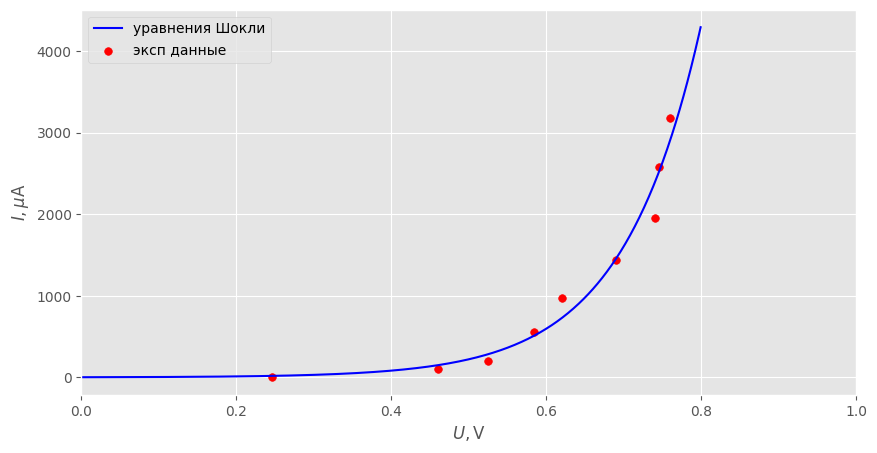

In [415]:
Udiod = np.arange(0, 0.8, 0.001)
Id = compute_I(I0_opt_d, Udiod, n_opt_d)

plt.figure(figsize=(10, 5))
plt.plot(Udiod, Id, label="уравнения Шокли", color='blue')
plt.scatter(Ud_exp, I_exp, label='эксп данные', s=30, color='red')
plt.xlabel(r"$U, \text{V}$")
plt.ylabel(r"$I, \mu \text{A}$")
plt.xlim(0, 1)
plt.legend()
plt.show()

In [391]:
print(f'ток насыщения: I0 = {I0_opt_d / 1e6:.3e} A')

ток насыщения: I0 = 4.253e-06 A


Если коэффициент эмиссии $n_0=1$:

$ n \cdot U_{T=300K} = n_0 \cdot U_{T} \\
3.904 \cdot U_{T=300K} =  \frac{U_{T=300K} \cdot T}{300K} \\
T = 3.904 \cdot 300K$


In [393]:
T = 3.904 * 300
T

1171.2

### стабилитрон

In [417]:
mask = Us > 0

Us_exp = Us[mask]
Is_exp = I2[mask]

In [418]:
result_s = differential_evolution(loss_function, bounds, args=(
    Is_exp, Us_exp))

In [419]:
I0_opt_s, n_opt_s = result_s.x
print(f"Оптимальные параметры: I0 = {I0_opt_s:.3e}, n = {n_opt_s:.3e}")

Оптимальные параметры: I0 = 8.989e-02, n = 2.988e+00


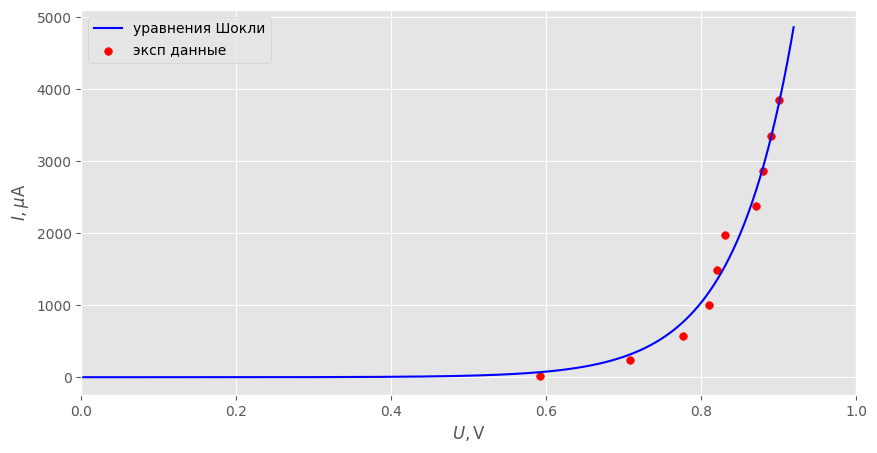

In [421]:
Ust = np.arange(0, 0.92, 0.001)
Is = compute_I(I0_opt_s, Ust, n_opt_s)

plt.figure(figsize=(10, 5))
plt.plot(Ust, Is, label="уравнения Шокли", color='blue')
plt.scatter(Us_exp, Is_exp, label='эксп данные', s=30, color='red')
plt.xlabel(r"$U, \text{V}$")
plt.ylabel(r"$I, \mu \text{A}$")
plt.xlim(0, 1)
plt.legend()
plt.show()

In [422]:
print(f'ток насыщения: I0 = {I0_opt_s / 1e6:.3e} A')

ток насыщения: I0 = 8.989e-08 A


Если коэффициент эмиссии $n_0=1$:

$ n \cdot U_{T=300K} = n_0 \cdot U_{T} \\
2.988 \cdot U_{T=300K} =  \frac{U_{T=300K} \cdot T}{300K} \\
T = 3.904 \cdot 300K$